In [2]:
import matplotlib.pyplot as plt

In [3]:
x = [i for i in range(10)]
y = [2*i for i in range(10)]

In [4]:
print(x, y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


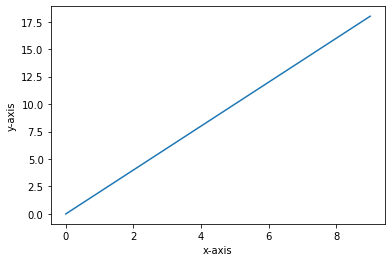

In [6]:
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x, y)

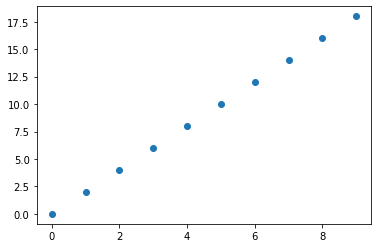

In [7]:
plt.scatter(x, y)

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from IPython.core.display_functions import display
from sklearn import neighbors, metrics
from sklearn.preprocessing import LabelEncoder

In [10]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(30, 4)
(120, 4)
(30,)
(120,)


In [19]:
data = pd.read_csv('car.data')
display(data)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [35]:
X = data[[
    'buying',
    'maint',
    'safety'
]].values

y = data[[
    'class'
]]

In [36]:
display(X)
display(y)

array([['vhigh', 'vhigh', 'low'],
       ['vhigh', 'vhigh', 'med'],
       ['vhigh', 'vhigh', 'high'],
       ...,
       ['low', 'low', 'low'],
       ['low', 'low', 'med'],
       ['low', 'low', 'high']], dtype=object)

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1723,good
1724,vgood
1725,unacc
1726,good


In [37]:
le = LabelEncoder()
for i in range(len(X[0])):
    X[:, i] = le.fit_transform(X[:, i])

display(X)

array([[3, 3, 1],
       [3, 3, 2],
       [3, 3, 0],
       ...,
       [1, 1, 1],
       [1, 1, 2],
       [1, 1, 0]], dtype=object)

In [38]:
lable_mapping = {
    'unacc':0,
    'acc':1,
    'good':2,
    'vgood':3
}

y['class'] = y['class'].map(lable_mapping)
y = np.array(y)

C:\Users\parsa\AppData\Local\Temp\ipykernel_14160\2781043915.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].map(lable_mapping)


In [39]:
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]


In [40]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn.fit(X_train, y_train)

d:\github\learning-python\venv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=25)

In [41]:
prediction = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction)

print("predictions: ", prediction)
print("accuracy: ", accuracy)

predictions:  [1 3 1 1 0 0 3 0 3 0 0 0 0 0 0 1 3 0 0 0 0 0 0 1 1 0 0 3 3 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 1 0 1 2 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 3 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 3 1 1 0 0 1 0 0 0 1 0 2 0 0 0
 0 0 0 0 1 0 3 0 0 3 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 3 1 1 0 0 0 0 0 0 0 0
 1 3 0 0 1 0 1 0 1 0 0 2 0 0 3 0 3 0 0 0 0 0 0 0 0 1 0 1 3 0 0 0 0 0 0 3 0
 1 1 1 0 0 0 3 1 3 0 1 0 1 1 0 1 0 0 3 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 3 3 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 3 0 1 3 0 0 0 1 0 0 0 0 0 1 0 0 0 2 1 0 0 0 0 0 0 0 1 3 0 0
 0 3 1 1 0 0 1 0 0 0 0 0 0]
accuracy:  0.7109826589595376


## Support vector machine

In [12]:
from sklearn import datasets
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X, y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [11]:
print(model)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

SVC()
(120, 4)
(30, 4)
(120,)
(30,)


In [13]:
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)

print(predictions, acc)

[2 2 2 2 1 1 2 1 1 2 0 2 0 2 1 1 1 1 2 0 0 2 1 2 1 0 1 0 0 0] 1.0


In [14]:
[classes[predict] for predict in predictions]

['Iris Virginica',
 'Iris Virginica',
 'Iris Virginica',
 'Iris Virginica',
 'Iris Versicolour',
 'Iris Versicolour',
 'Iris Virginica',
 'Iris Versicolour',
 'Iris Versicolour',
 'Iris Virginica',
 'Iris Setosa',
 'Iris Virginica',
 'Iris Setosa',
 'Iris Virginica',
 'Iris Versicolour',
 'Iris Versicolour',
 'Iris Versicolour',
 'Iris Versicolour',
 'Iris Virginica',
 'Iris Setosa',
 'Iris Setosa',
 'Iris Virginica',
 'Iris Versicolour',
 'Iris Virginica',
 'Iris Versicolour',
 'Iris Setosa',
 'Iris Versicolour',
 'Iris Setosa',
 'Iris Setosa',
 'Iris Setosa']